# iFood Marketing analysis
- perform exploratory and statistical analysis to uncover actionable insights to help optimize the organizations marketing campaigns

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

#filter unneccesary warnings
import warnings
warnings.filterwarnings('ignore')

In [269]:
#load data
df = pd.read_csv(r'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0SL1EN/marketing_campaign.csv', sep=';')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


## Objectives
- analyse the dataset to uncover insights that will make the next marketing campaign profitable

#### questions to ask
- is there a relationship between the campaign acceptance and the customers profiles(income, kidathome)
- is there a relationship between a customers purchasing characteristics and the acceptance to marketing campaings?
- is there a relationship between a customers profile and their purchasing characteristics

#### deliver insights both in graphs and visualizations
- pivot table summaries
- plot visualizations
- use streamlit for presentations 


## Data Wrangling and Analysis

In [165]:
# check for missing values, data type inconsistencies and shape
print('df shape\n', df.shape)
df.info()

df shape
 (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases

In [270]:
# fill null income values with 0
df['Income'] = df['Income'].fillna(0)

# drop duplicates
df.drop_duplicates()

# correct data type inconcistencies
df[['Marital_Status', 'Education']] = df[['Marital_Status', 'Education']].astype('category')

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

print('shape:\n', df.shape)
df.info()

shape:
 (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   category      
 3   Marital_Status       2240 non-null   category      
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProduc

In [271]:
# calculate new col for customer age at 2020 because the data was collected in 2020
df['Customer_age'] = 2020 - df.Year_Birth

# calculate customer enrollment by days using the Dt_customer column
current_day = pd.to_datetime('now')
time_diff = current_day - df['Dt_Customer']
df['Customer_days'] = time_diff.dt.days

# drop Year_Birth and Dt_customer columns
df.drop(columns=['Year_Birth','Dt_Customer'], inplace=True)
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_age,Customer_days
0,5524,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,3,11,1,63,4721
1,2174,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,3,11,0,66,4171
2,4141,Graduation,Together,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,3,11,0,55,4370
3,6182,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,3,11,0,36,4197
4,5324,PhD,Married,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,3,11,0,39,4219


In [225]:
df.nunique()

ID                     2240
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
Customer_age             59
Customer_days           663
dtype: int64

In [272]:
# look at the unique categories across some columns
print(df.Education.unique())
print(df.Teenhome.unique())
print(df.Kidhome.unique())
print(df.Z_CostContact.unique())
print(df.Response.unique())

['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle']
Categories (5, object): ['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD']
[0 1 2]
[0 1 2]
[3]
[1 0]


In [273]:
num_cols = ['Customer_age', 'Customer_days','Income', 'Recency', 'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds','NumDealsPurchases',
'NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']
print(len(num_cols))
cols = [col for col in df.select_dtypes(exclude='category')]
len(cols)

15


27

In [ ]:
# plot boxplots for the columns using gca
for col in num_cols:
    fig = plt.figure(figsize=(6,4))
    axs= fig.gca()
    sns.boxplot(data=df, x=col)
    axs.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
    axs.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
    axs.set_title(col)

plt.show()

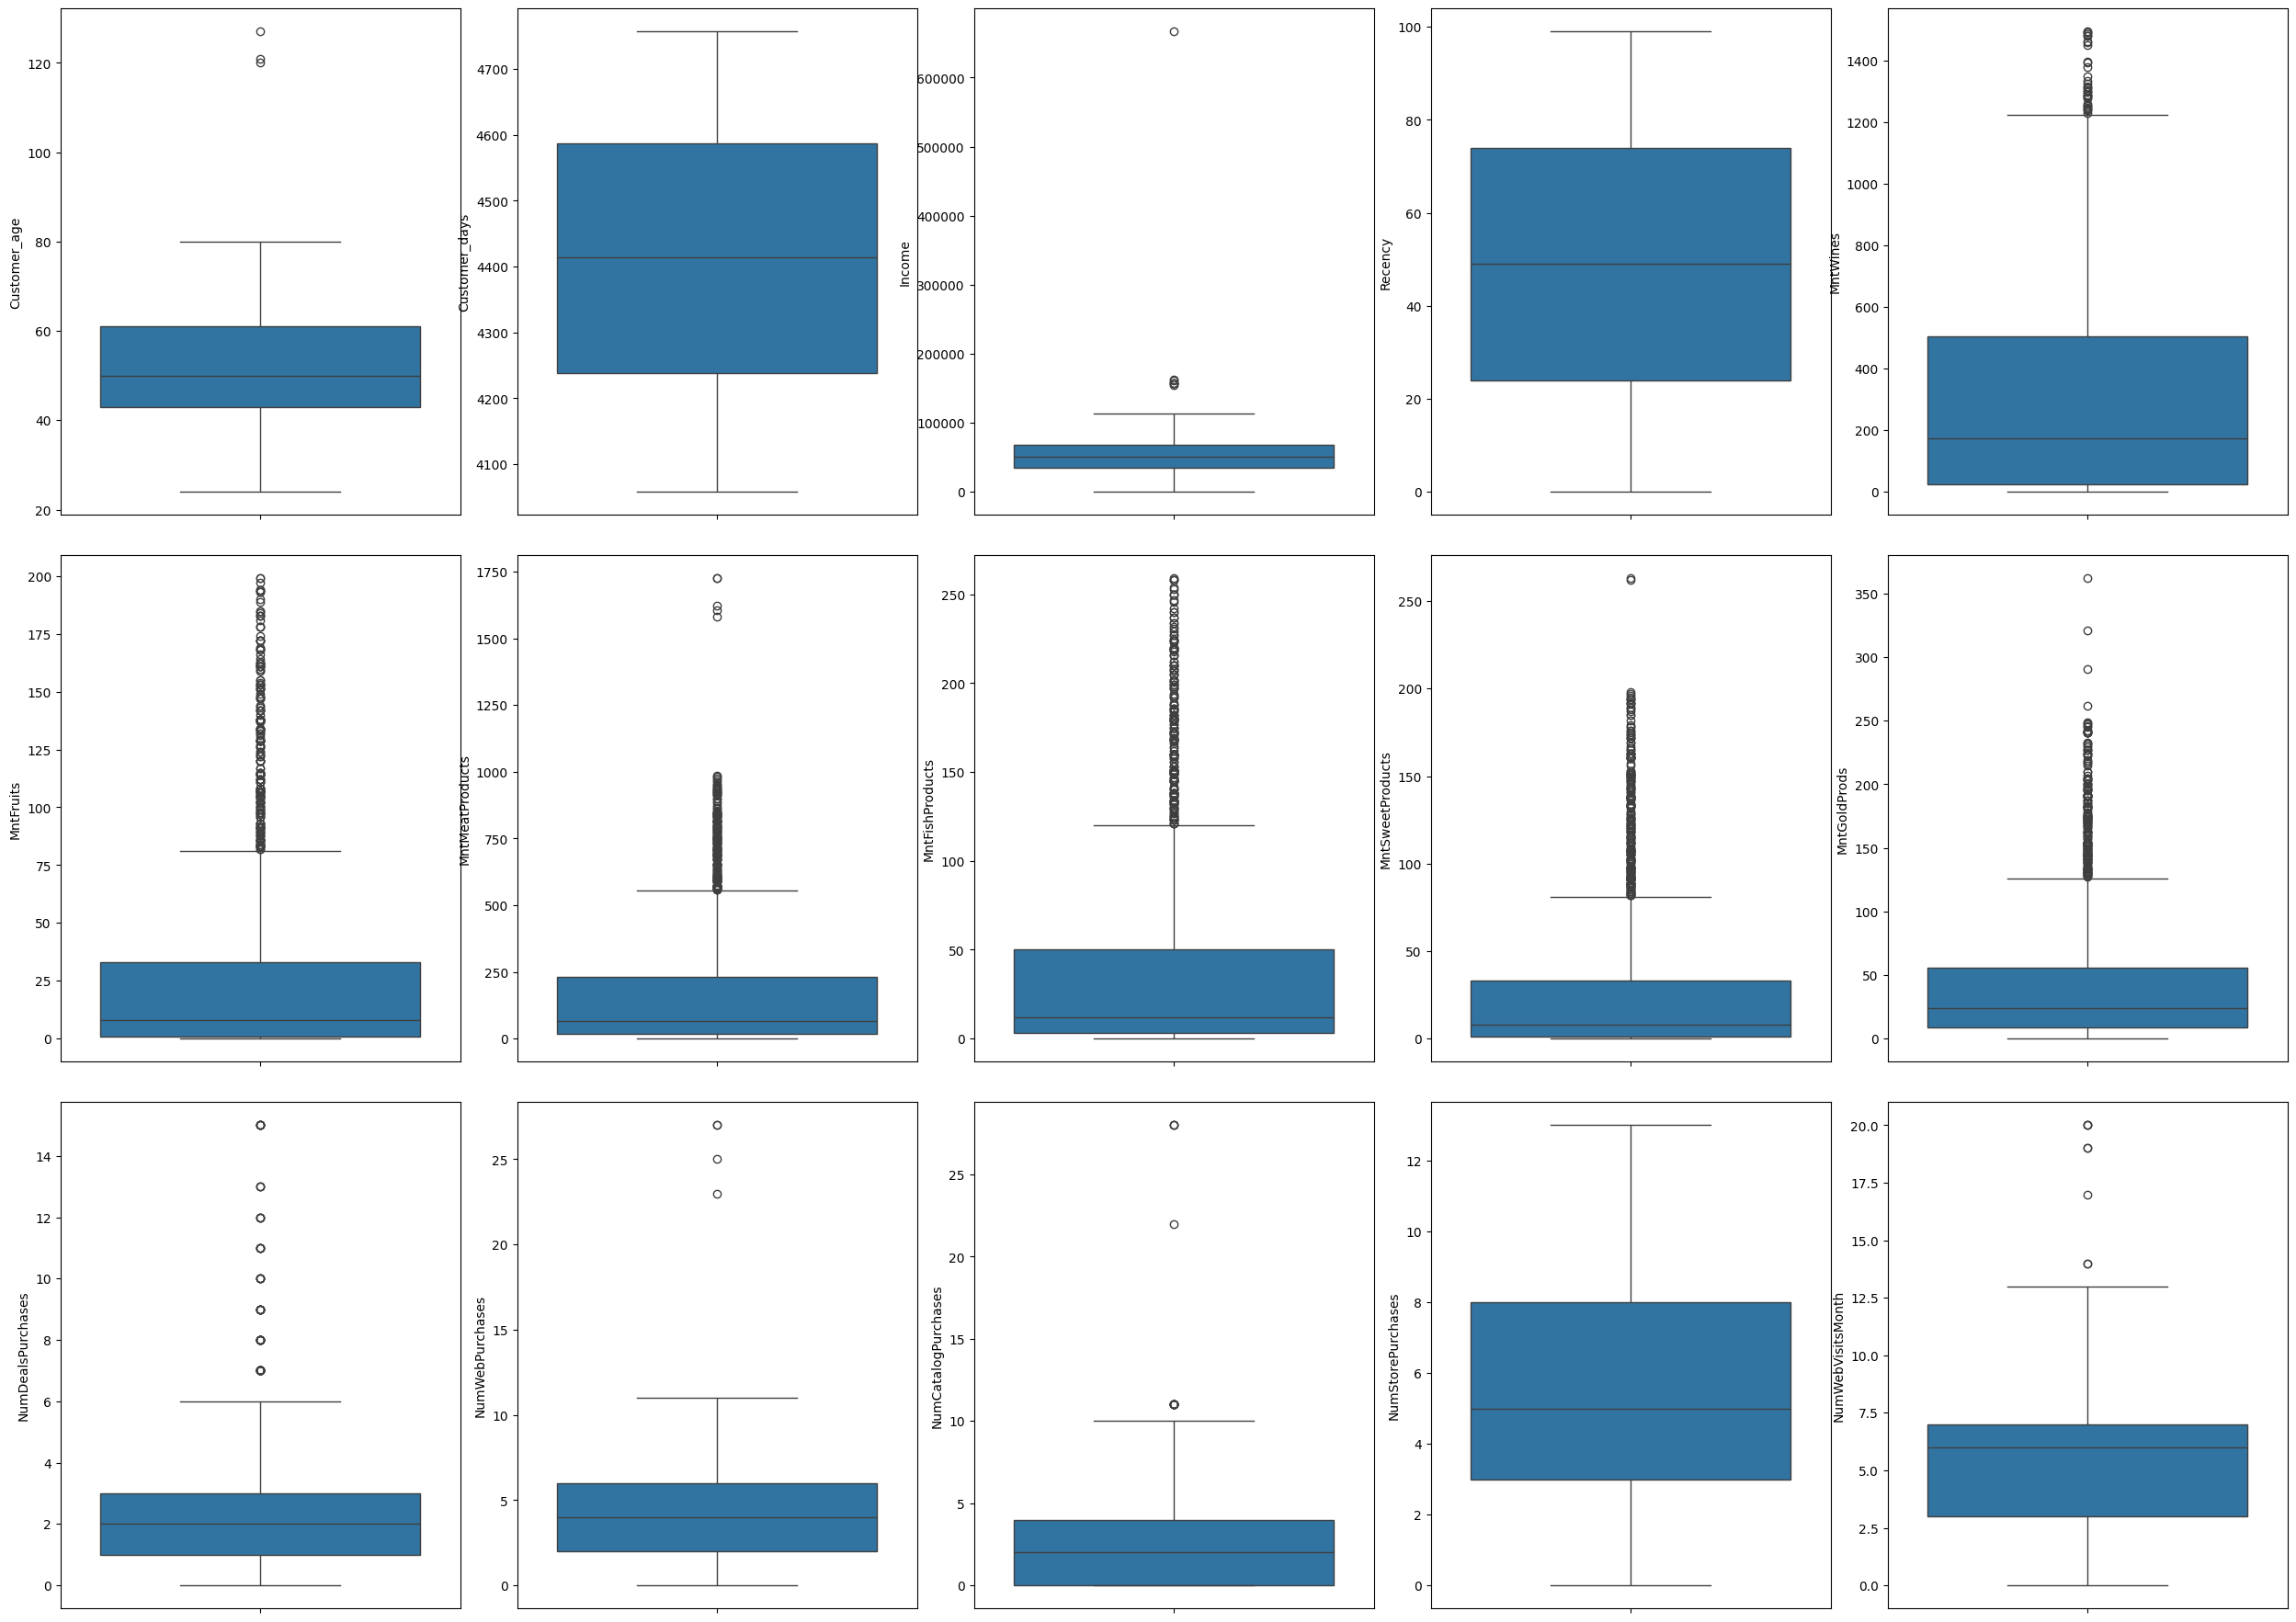

In [274]:
# Investigate outliers
# plot boxplots for each numerical column
def plot_boxplots(df):
    fig,axs = plt.subplots(3, 5, figsize=(25, 18))
    fig.subplots_adjust(wspace=1.5, hspace=0.7)
    axs = axs.flatten()
    plt.tight_layout()

    for index, col in enumerate(num_cols):
        if index < len(num_cols):
            sns.boxplot(df[col], ax=axs[index])
        else:
            break
    plt.show()

plot_boxplots(df)

In [275]:
outlier_cols = ['Income','Customer_age']

def remove_outliers(data, outlier_cols):
    
    # loop throgh the outlier_cols and remove outliers
    for col in outlier_cols:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Filter the DataFrame based on the current column's bounds
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

    return data

df = remove_outliers(df,outlier_cols )

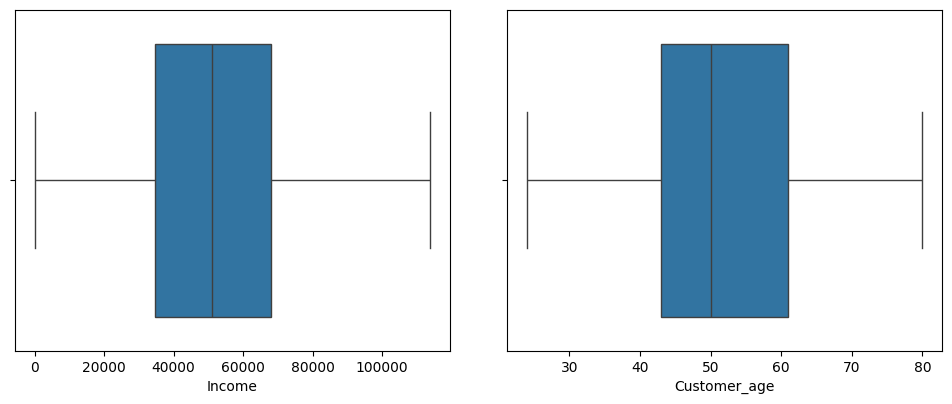

In [278]:
fig, axs = plt.subplots(1, 2, figsize=(10,4 ))
axs= axs.flatten()
fig.tight_layout()

for index, col in enumerate(outlier_cols):
    if index < len(outlier_cols):
        sns.boxplot(data=df, x=col, ax=axs[index])
    
    else:
        break
plt.show()

##### Outliers Report 
- remove outliers from the customer metadata columns i.e Income and Age
- The other columns i.e amounts spent to purchase various categories of products have significant number of outliers but the information is crucial as it describes customer purchase habits.
- **Retain the other outliers** to remove them will be to remove significant information from the dataset

In [279]:
#drop the 'Z_CostContact', 'Z_Revenue' columns because they dont add much information to our analysis(they are constant for all records)
df.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

# rearrange the columns 
start_cols= ['ID', 'Customer_age','Customer_days' ]
acceptance_cols = ['AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5','Complain', 'Response']
cols_re = start_cols + acceptance_cols
new_order  = start_cols + [col for col in df.columns if col not in cols_re ] + acceptance_cols

df = df.reindex(columns=new_order)
df.head()

,ID,Customer_age,Customer_days,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response
0,5524,63,4721,Graduation,Single,58138.0,0,0,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,66,4171,Graduation,Single,46344.0,1,1,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,55,4370,Graduation,Together,71613.0,0,0,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,36,4197,Graduation,Together,26646.0,1,0,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,39,4219,PhD,Married,58293.0,1,0,94,173,...,3,6,5,0,0,0,0,0,0,0


In [280]:
#summary statistics
round(df.describe(),2 ).T

,count,mean,std,min,25%,50%,75%,max
ID,2229.0,5589.30,3244.84,0.0,2829.0,5455.0,8420.0,11191.0
Customer_age,2229.0,51.11,11.71,24.0,43.0,50.0,61.0,80.0
Customer_days,2229.0,4411.78,202.25,4058.0,4239.0,4414.0,4587.0,4757.0
Income,2229.0,51066.27,21279.24,0.0,34600.0,50943.0,68118.0,113734.0
Kidhome,2229.0,0.44,0.54,0.0,0.0,0.0,1.0,2.0
Teenhome,2229.0,0.51,0.54,0.0,0.0,0.0,1.0,2.0
Recency,2229.0,49.11,28.95,0.0,24.0,49.0,74.0,99.0
MntWines,2229.0,304.99,336.76,0.0,24.0,176.0,505.0,1493.0
MntFruits,2229.0,26.35,39.76,0.0,2.0,8.0,33.0,199.0
MntMeatProducts,2229.0,165.28,219.34,0.0,16.0,67.0,231.0,1725.0


In [281]:
df.describe(include='category').T

,count,unique,top,freq
Education,2229,5,Graduation,1124
Marital_Status,2229,8,Married,861


**Insights Numerical columns**
- On average customers spend the most amount on Wines followed by Meat products with the lowest amount spent on Fruits
- The number of Instore purchases recorded the highest average number followed by web purchasesand lastly catalog purchases

**Insights Categorical columns**
- Customers with Graduate education and those that are married form the largest customer group for the company

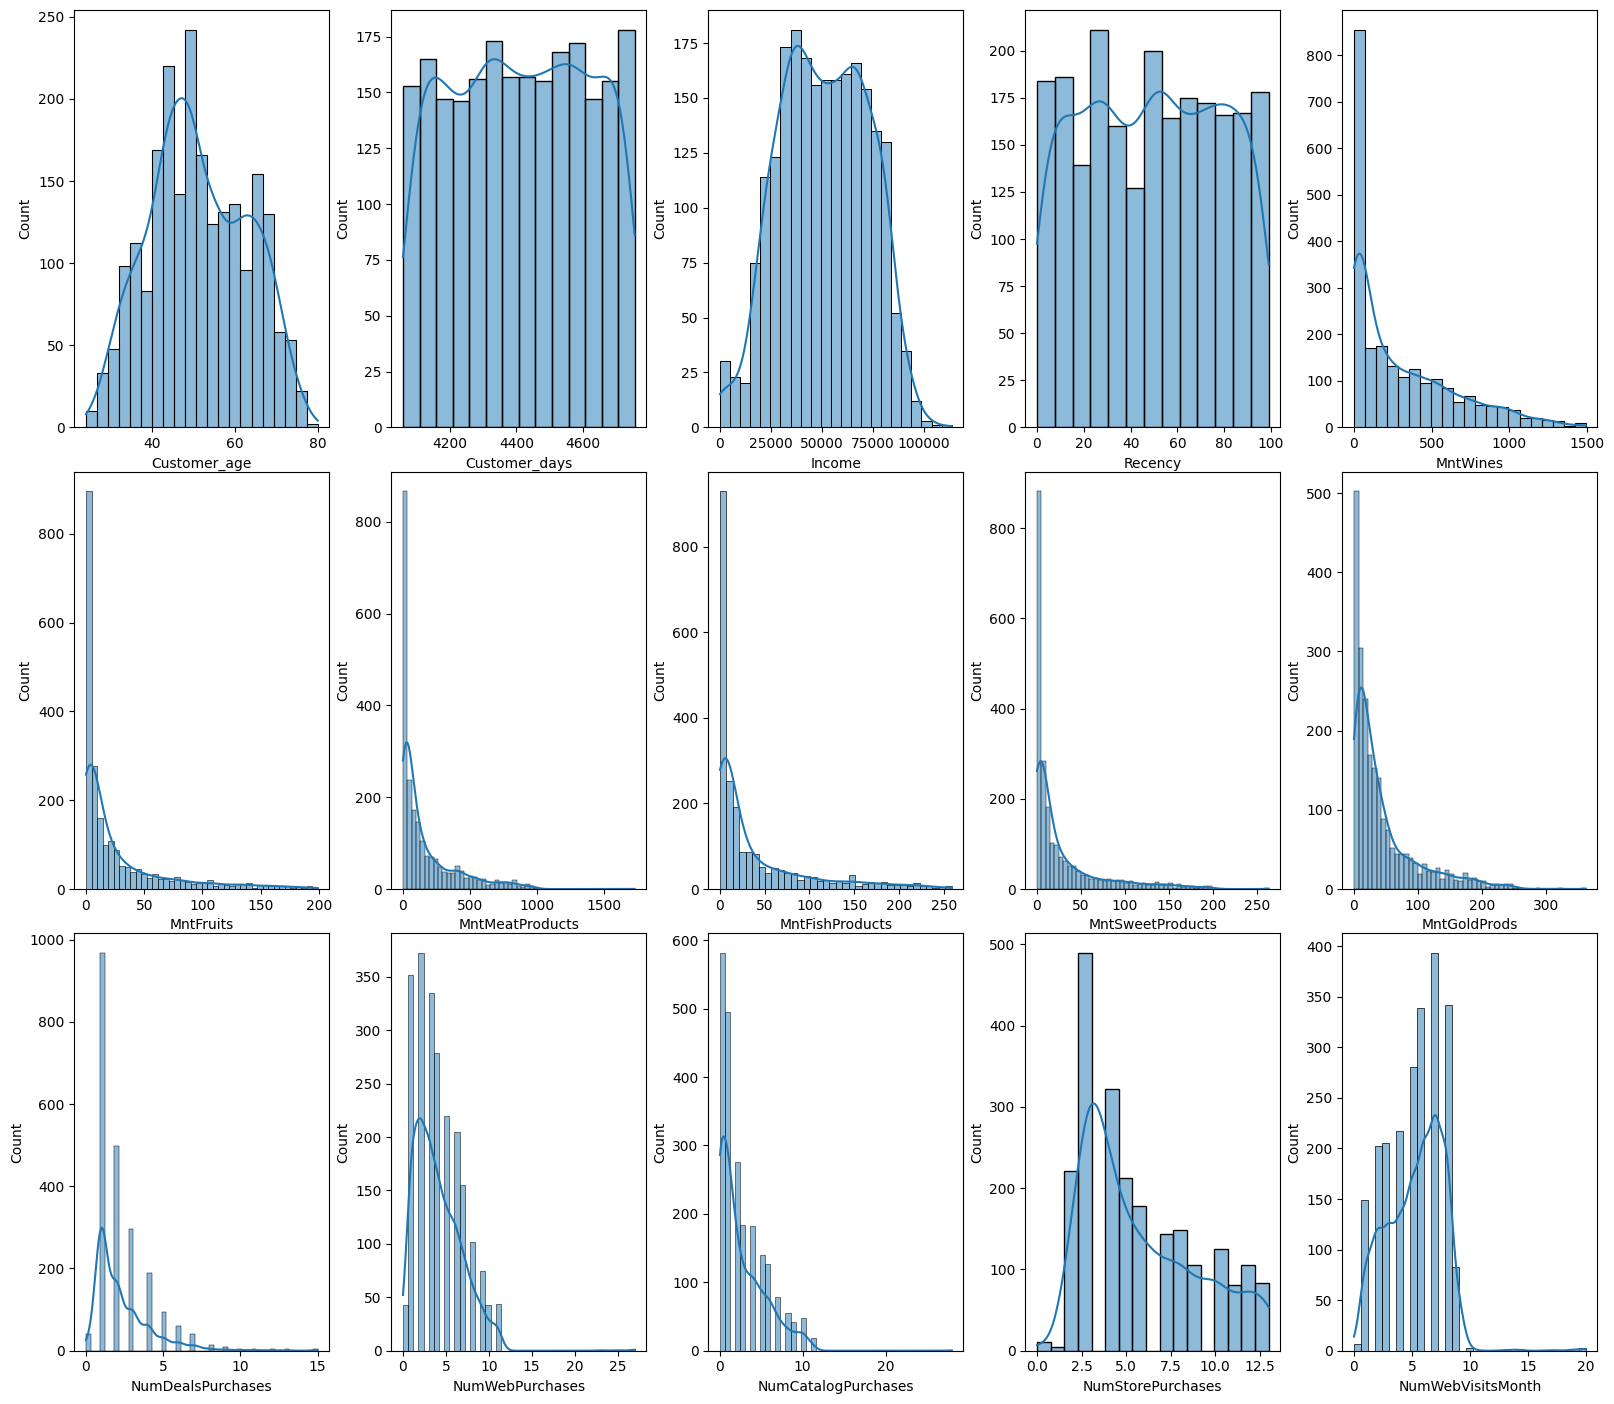

In [283]:
# investigate distribution for numerical columns non binary columns
dist_cols = ['Customer_age', 'Customer_days', 'Income','Recency', 'MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

def plot_histograms(df, dist_cols):
    fig, axs = plt.subplots(3, 5, figsize=(16,14))
    axs = axs.flatten()
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    plt.tight_layout()

    for index, col in enumerate(dist_cols):
        if index < len(dist_cols):
            sns.histplot(data=df, x=col, ax=axs[index],kde=True)
        else:
            break
plt.show()
plot_histograms(df, dist_cols)

**Insights** from the feature distributions
- The features describing the amount spent across the different product categories have right-skewed distributions which indicate the precense of extreme values to the right. 
    
    That is, Majority of the customers are spend low amounts but there are a few outlier customers spending large amounts across the product categories.

- Income and Customer_age columns have a nearly normal distribution
- There is a relatively uniform distribution for Recency and Customer days, which means there is a relatively constant variance in the columns

- web visits distribution is left skewed; the majority of the customers visit the company's web monthly but there are few of them that don't represented by the left tail skew

## Bivariate and Multivariate Analysis

In [286]:
# correlation between num cols exluding binary columns
exclude_cols = ['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5', 'Complain', 'Response']
num_cols1 = [col for col in df.select_dtypes(exclude='category') if col not in exclude_cols ]
corr = df[num_cols1].corr(method='spearman') # to capture non-linear relationships
corr = round(corr, 2)
corr

,Customer_age,Customer_days,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Customer_age,1.00,-0.01,0.21,-0.26,0.39,0.02,0.24,0.03,0.12,0.03,-0.00,0.08,0.09,0.17,0.18,0.17,-0.13
Customer_days,-0.01,1.00,-0.02,-0.05,0.02,0.03,0.15,0.13,0.15,0.13,0.12,0.23,0.22,0.20,0.12,0.11,0.30
Income,0.21,-0.02,1.00,-0.56,0.05,0.00,0.83,0.58,0.81,0.58,0.57,0.51,-0.19,0.58,0.79,0.74,-0.63
Kidhome,-0.26,-0.05,-0.56,1.00,-0.05,0.01,-0.58,-0.45,-0.55,-0.45,-0.44,-0.43,0.26,-0.43,-0.60,-0.56,0.48
Teenhome,0.39,0.02,0.05,-0.05,1.00,0.01,0.11,-0.20,-0.13,-0.23,-0.20,-0.02,0.48,0.15,-0.04,0.08,0.11
Recency,0.02,0.03,0.00,0.01,0.01,1.00,0.02,0.03,0.03,0.01,0.02,0.02,0.01,-0.00,0.03,0.01,-0.02
MntWines,0.24,0.15,0.83,-0.58,0.11,0.02,1.00,0.52,0.83,0.52,0.50,0.57,0.05,0.74,0.83,0.81,-0.40
MntFruits,0.03,0.13,0.58,-0.45,-0.20,0.03,0.52,1.00,0.72,0.70,0.69,0.57,-0.12,0.47,0.64,0.58,-0.45
MntMeatProducts,0.12,0.15,0.81,-0.55,-0.13,0.03,0.83,0.72,1.00,0.73,0.70,0.64,-0.04,0.68,0.85,0.79,-0.50
MntFishProducts,0.03,0.13,0.58,-0.45,-0.23,0.01,0.52,0.70,0.73,1.00,0.70,0.56,-0.12,0.46,0.66,0.58,-0.47


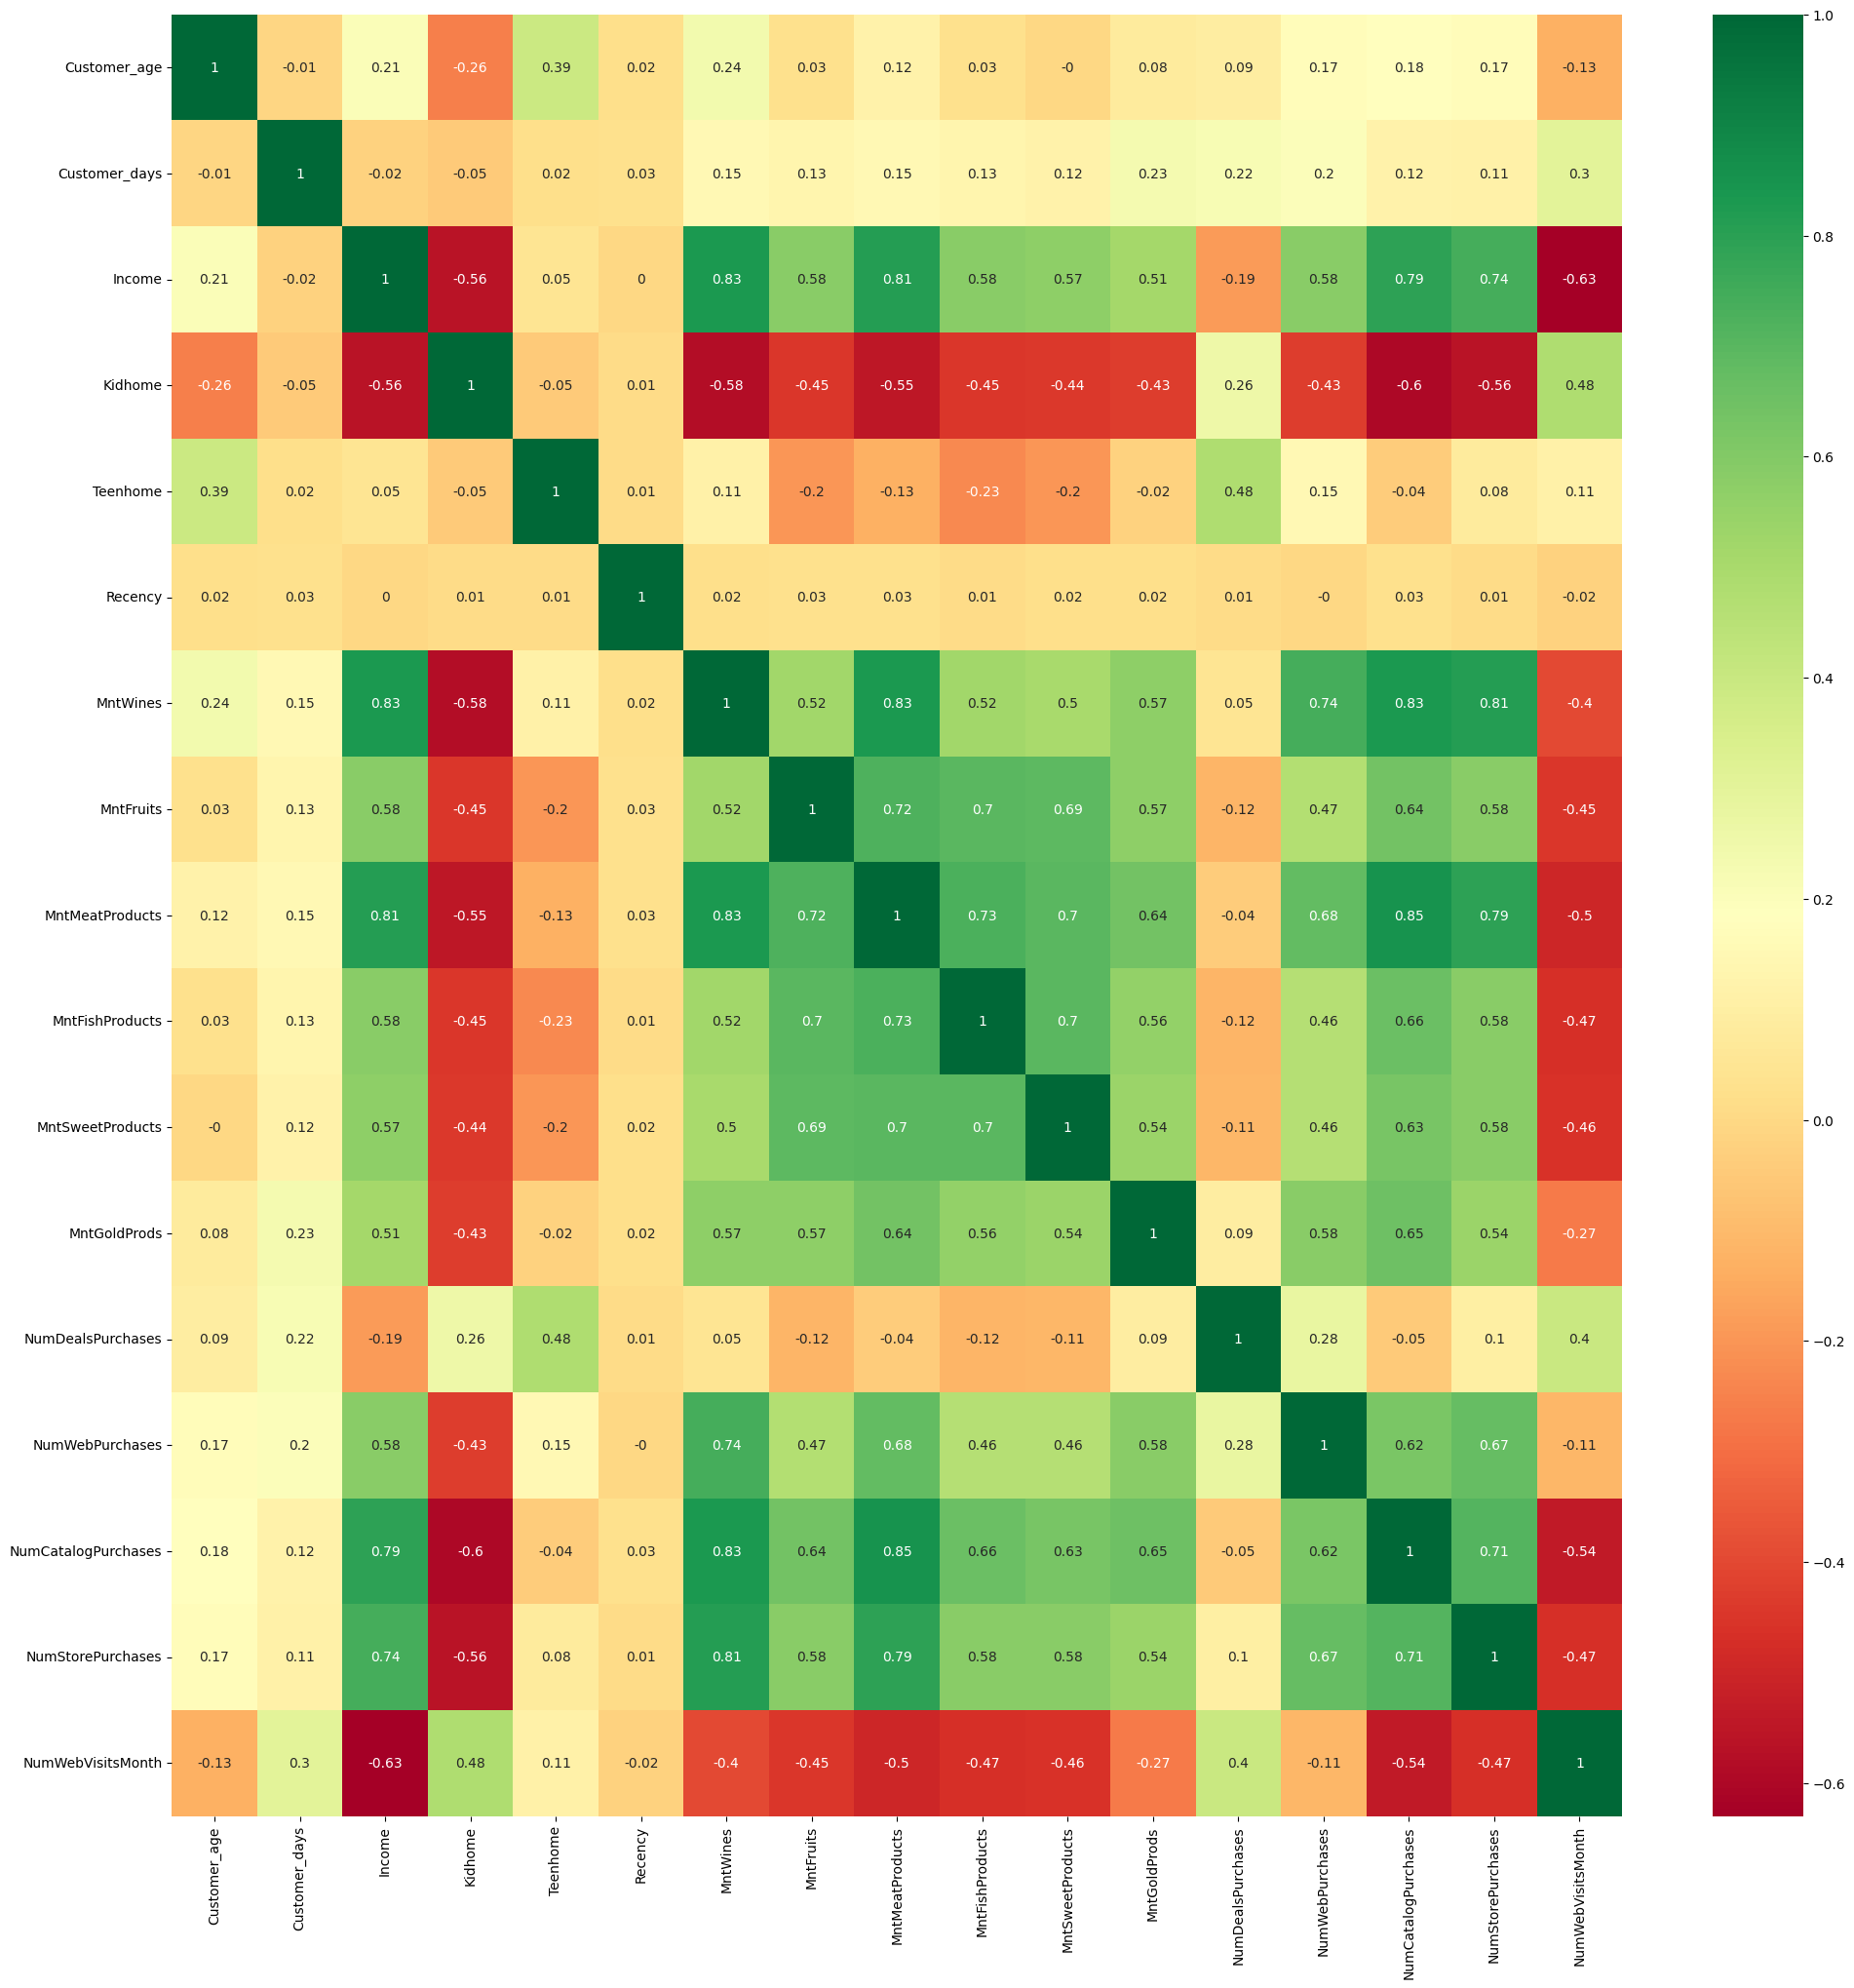

In [238]:
# plot correlation heatmap
plt.figure(figsize=(24, 24))
sns.heatmap(data=corr, annot=True,cmap='RdYlGn') # RdYlGn, coolwarm
plt.show()

##### Display the correlations in a 2-D Dataframe (threshold value = 0.5 or -0.5)

In [239]:
# create a mask for the upper triangle
mask = corr.mask(np.triu(np.ones_like(corr, dtype=np.bool)))

# flatten the masked triangle and sort values
corr_unstacked = mask.unstack().sort_values(ascending=False)

In [240]:
# positive correlations that meet the threshold > 0.5
positive_corr = corr_unstacked[abs(corr_unstacked > 0.5)]  # filter values with correlation > 0.5

# Convert to flat DataFrame
positive_corr_df = positive_corr.reset_index()
positive_corr_df.columns = ['Feature_1', 'Feature_2', 'Correlation'] 

#sort 
positive_corr_df = positive_corr_df.sort_values(by=['Correlation', 'Feature_1'], ascending=False)

print(positive_corr_df)
print('Average of Correlations above The 0.5 Threshold\n',positive_corr_df.Correlation.mean())

              Feature_1            Feature_2  Correlation
0       MntMeatProducts  NumCatalogPurchases         0.85
1              MntWines  NumCatalogPurchases         0.83
3              MntWines      MntMeatProducts         0.83
2                Income             MntWines         0.83
5              MntWines    NumStorePurchases         0.81
4                Income      MntMeatProducts         0.81
6       MntMeatProducts    NumStorePurchases         0.79
7                Income  NumCatalogPurchases         0.79
8              MntWines      NumWebPurchases         0.74
9                Income    NumStorePurchases         0.74
10      MntMeatProducts      MntFishProducts         0.73
11            MntFruits      MntMeatProducts         0.72
12  NumCatalogPurchases    NumStorePurchases         0.71
13      MntMeatProducts     MntSweetProducts         0.70
15            MntFruits      MntFishProducts         0.70
14      MntFishProducts     MntSweetProducts         0.70
16            

** Insights** 
- **Income** shows high positive correlation[above the threshold 0.5] with the amount spend across the various product categories('MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds')
    - this means that as the income of the customer increases so does the amount spent on the product categories
    - Amount spend on wines shows the highest positive correlation(0.83) followed by MntMeatProducts(0.81), MntFishProducts (0.58), MntFruits(0.58), MntSweetProducts (0.57) then lastly MntGoldProds (0.51)
    -  may indicate that income levels strongly influence a customers purchasing power

- There is a high positive correlation(multicollineraity) among  the amounts spend across the various product categories which suggests that most customers actively shop for all products at the same time.
    - The MntWines and MntMeatProducts columns have the highest positive correlation 

- There is also significant positive correlation between the points of purchase(i.e. 'NumWebPurchases' 'NumCatalogPurchases', 'NumStorePurchases' ), with the highest correlation recorded between NumCatalogPurchases and NumStorePurchases at 0.71

- Additionaly, there is high positive correlation between the points of purchase columns and the product category columns
across board.

In [290]:
# negative correlations that meet the threshold > -0.5
negative_corr = corr_unstacked[abs(corr_unstacked < -0.5)]  

# Convert to flat DataFrame
negative_corr_df = negative_corr.reset_index()

# rename columns
negative_corr_df.columns = ['Feature_1', 'Feature_2', 'Correlation'] 

#sort by feature and correlation
negative_corr_df = negative_corr_df.sort_values(by=['Feature_1','Correlation'], ascending=False)

print(negative_corr_df)

             Feature_1            Feature_2  Correlation
0  NumCatalogPurchases    NumWebVisitsMonth        -0.54
1              Kidhome      MntMeatProducts        -0.55
3              Kidhome    NumStorePurchases        -0.56
4              Kidhome             MntWines        -0.58
5              Kidhome  NumCatalogPurchases        -0.60
2               Income              Kidhome        -0.56
6               Income    NumWebVisitsMonth        -0.63


#### Overall Correlation Results
Question to answer: is there a relationship between a customers profile and their purchasing characteristics?

-  **Income** of the Customers stands out as a mojor influence on the **customers purchasing habits** i.e. it influences the amount they spend to shop on the different product categories. 

    Income has a negative correlation to KidHome as well as Number of web visitsmonth

- Kidhome has high negative correlations with [MntMeatProducts, NumStorePurchases, MntWines, NumCatalogPurchases], this shows that the number of kids at home has a negative effect on a customer's purchasing choices 

In [242]:
df.Marital_Status.unique()

['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO']
Categories (8, object): ['Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together', 'Widow', 'YOLO']

In [291]:
# convert the 'Absurd', 'Alone' 'YOLO' categories to 'Single'
cat_replace = ['Absurd', 'Alone', 'YOLO']
df.Marital_Status.replace(cat_replace, 'Single', regex=True, inplace=True)
df.Marital_Status.unique()

['Single', 'Together', 'Married', 'Divorced', 'Widow']
Categories (5, object): ['Divorced', 'Married', 'Single', 'Together', 'Widow']

##### Distribution of Customers based on Education and Marital Status

Education categories count
             count
Education        
Graduation   1124
PhD           481
Master        369
2n Cycle      201
Basic          54
Marital_Status categories count
                 count
Marital_Status       
Married           861
Together          575
Single            486
Divorced          230
Widow              77


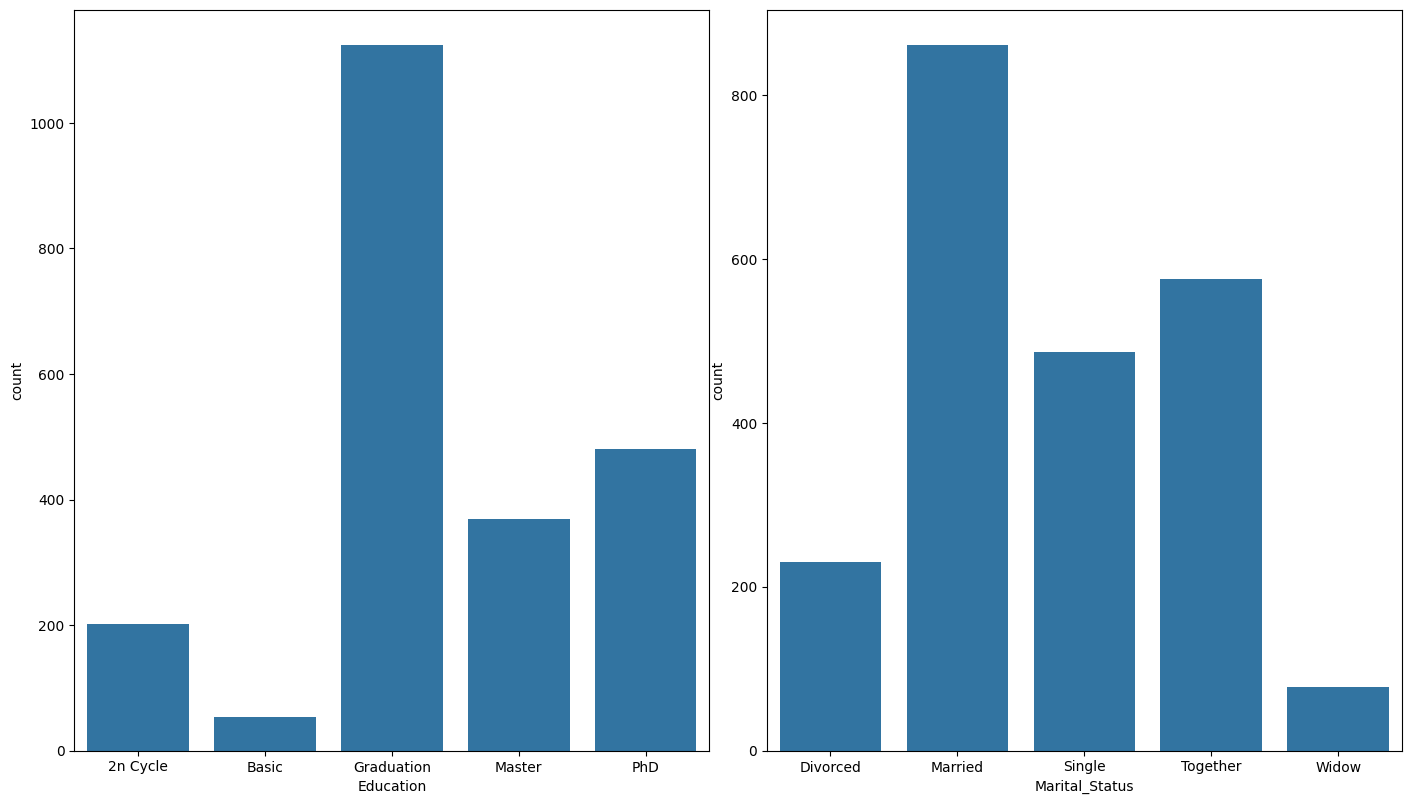

In [292]:
# calculate individual column count
ed_count = df.Education.value_counts().to_frame()
print('Education categories count\n',ed_count)

status_counts = df.Marital_Status.value_counts().to_frame()
print('Marital_Status categories count\n',status_counts)

# Categorical value analysis
cat_cols = ['Education', 'Marital_Status']
fig, axs = plt.subplots(1, 2, figsize=(14, 8))
axs= axs.flatten()
fig.tight_layout()

for index, col in enumerate(cat_cols):
    if index < len(cat_cols):
        sns.countplot(data=df, x=col, ax=axs[index])
    
    else:
        break
plt.show()

In [245]:
# Education & Marital_status crosstabulation 
ed_status = pd.crosstab(index=df.Education, columns=df.Marital_Status)
ed_status

Marital_Status,Divorced,Married,Single,Together,Widow
Education,,,,,
2n Cycle,22,81,36,57,5
Basic,1,20,18,14,1
Graduation,118,433,254,284,35
Master,37,138,77,105,12
PhD,52,189,101,115,24


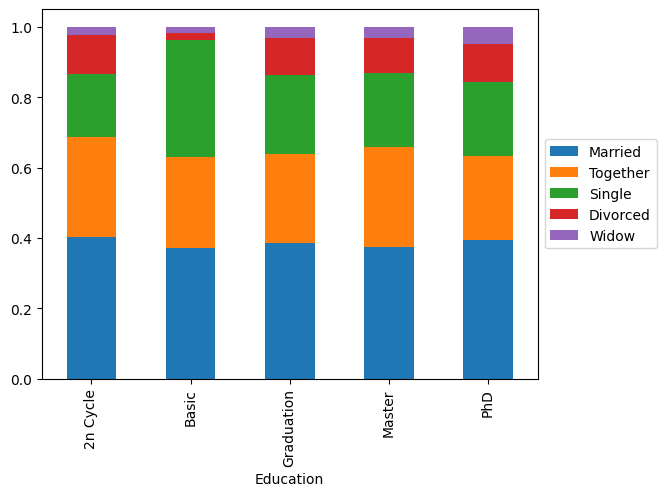

In [246]:
# re_order the columns from the largest to smallest category
cols_order = ['Married', 'Together','Single','Divorced','Widow']
ed_status = ed_status.reindex(columns=cols_order)

# calculate the proportions and plot a bar plot
ed_status.apply(lambda x: x/x.sum(), axis=1).plot(kind='bar', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


<Axes: xlabel='Marital_Status', ylabel='Education'>

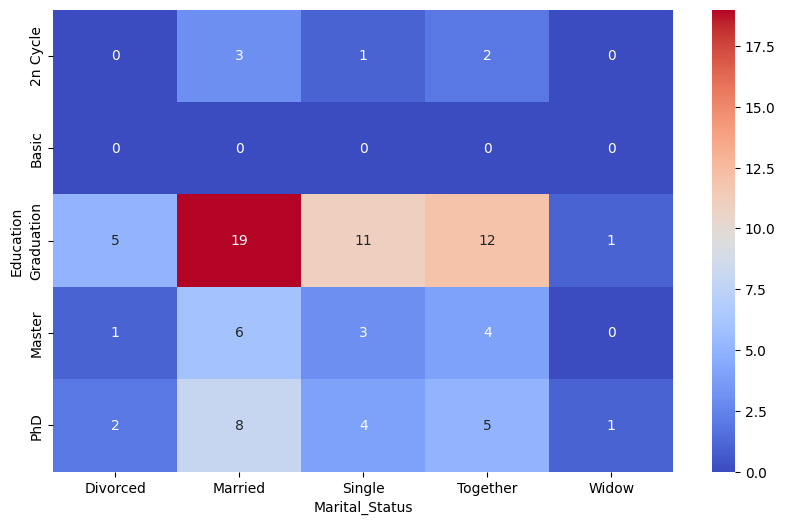

In [247]:
plt.figure(figsize=(10,6))
sns.heatmap((pd.crosstab(df['Education'],
            df['Marital_Status'], normalize=True
            )*100).astype('int'), annot=True, fmt="d", cmap='coolwarm')

- Married Graduate Customers form the highest customer base (19% Percent) followed by Graduate Together customers with(12 percent)

**Insights:** the marketing campaigns need to be geared towards influencing the educated(Graduate, PhD And Masters) demographic of customers who are in a marriage,are together or single.


#### Investigating the Marketing Campaigns

In [293]:
# Calculate how the marketing campaigns perfomed
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

def acceptance_df(df):
    totals_df = []
    for col in campaign_cols:
        # Ensure both 0 and 1 appear, fill missing with 0
        campaigns = df[col].value_counts().reindex([0, 1]).to_frame().T
        campaigns.columns = ['Not_Accepted', 'Accepted']
        totals_df.append(campaigns)
    
    # Create final DataFrame
    index = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6']
    result_df = pd.concat(totals_df, axis=0)
    result_df.index = index
    return result_df

campaign_numbers = acceptance_df(df)
campaign_numbers

,Not_Accepted,Accepted
C1,2085,144
C2,2199,30
C3,2066,163
C4,2062,167
C5,2067,162
C6,1895,334


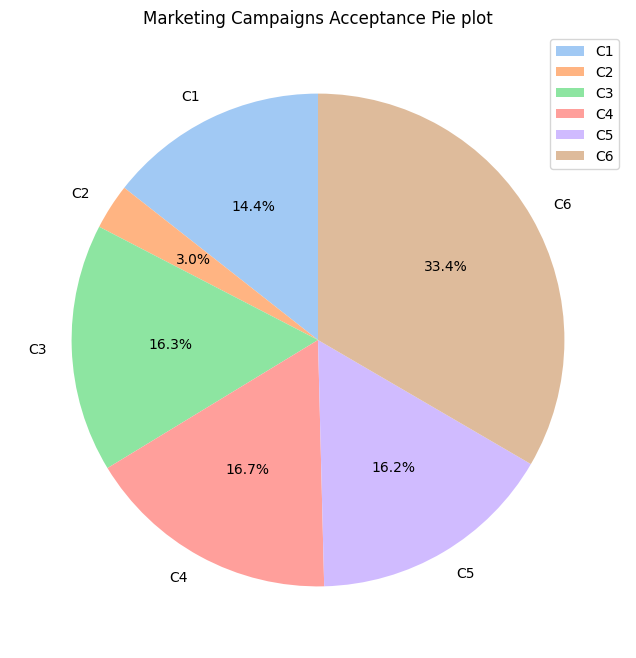

In [294]:
# a pie plot of marketing acceptance cols
plt.figure(figsize=(10,8))
plt.pie(campaign_numbers.Accepted, normalize=True, autopct='%1.1f%%',labels=campaign_numbers.index, startangle=90, colors=sns.color_palette('pastel'))
plt.legend()
plt.title( 'Marketing Campaigns Acceptance Pie plot')
plt.show()

- the last marketing campaign 'Response' recorded the highest number of acceptance (33.4%) with the least number recorded in the 2nd campaign(3%)
- the marketing acceptance numbers show an increasing trend from the first campaign to the Last campaign

##### Determine the relationship between Education & Campaign acceptance and Marital status & Campaign acceptance

#### Investigate the influence of income and age on Marketing acceptance 

In [295]:
print(max(df.Customer_age))

# define labels and bins for customer ages
bin_breaks = [20, 30, 40, 50, 60, 70, 80]
labels = ['Young_Adult', 'Adult', 'Middle-Aged', 'Pre-Senior', 'Senior', 'Elderly']

df['Age_group'] = pd.cut(df.Customer_age, bins=bin_breaks, labels=labels)
df.head()

80


,ID,Customer_age,Customer_days,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,Age_group
0,5524,63,4721,Graduation,Single,58138.0,0,0,58,635,...,4,7,0,0,0,0,0,0,1,Senior
1,2174,66,4171,Graduation,Single,46344.0,1,1,38,11,...,2,5,0,0,0,0,0,0,0,Senior
2,4141,55,4370,Graduation,Together,71613.0,0,0,26,426,...,10,4,0,0,0,0,0,0,0,Pre-Senior
3,6182,36,4197,Graduation,Together,26646.0,1,0,26,11,...,4,6,0,0,0,0,0,0,0,Adult
4,5324,39,4219,PhD,Married,58293.0,1,0,94,173,...,6,5,0,0,0,0,0,0,0,Adult


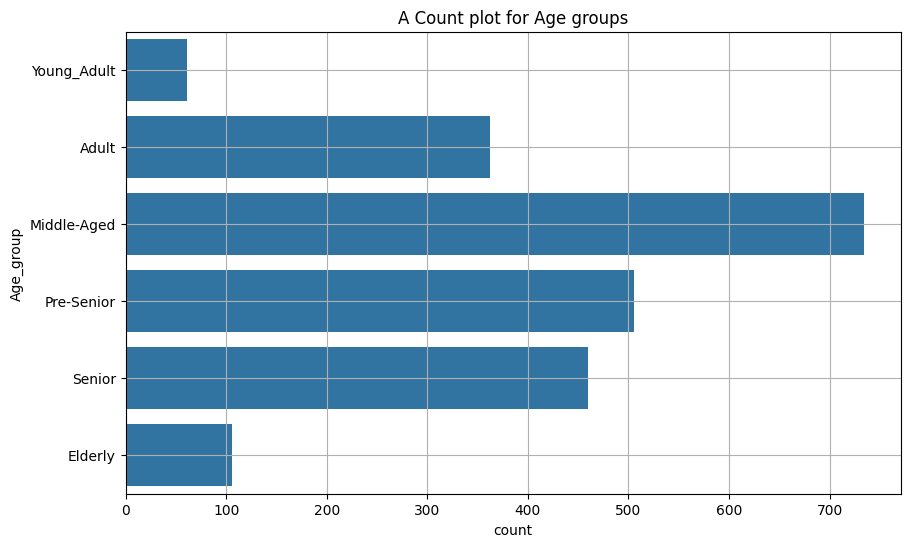

In [258]:
plt.figure(figsize=(10, 6))
sns.countplot(df.Age_group)
plt.title('A Count plot for Age groups')
plt.grid(True)
plt.show()

The company **main customer** base is aged between 40-60 years old with the largest group being between 40-50 years old.

In [297]:
# investigate how age affected the marketing campaigns 4 and 6 with the largest acceptance rates
print('Campaign No 4')
print(pd.crosstab(df.Age_group, df.AcceptedCmp4, normalize=True)*100)

print('---------')

print('Campaign No 6')
print(pd.crosstab(df.Age_group, df.Response, normalize=True)*100)


Campaign No 4
AcceptedCmp4          0         1
Age_group                        
Young_Adult    2.557201  0.179453
Adult         15.388066  0.852400
Middle-Aged   30.955585  1.973979
Pre-Senior    20.637057  2.063706
Senior        18.887393  1.749664
Elderly        4.082548  0.672948
---------
Campaign No 6
Response             0         1
Age_group                       
Young_Adult   2.108569  0.628084
Adult        13.234634  3.005832
Middle-Aged  28.218932  4.710633
Pre-Senior   19.874383  2.826380
Senior       17.990130  2.646927
Elderly       3.589053  1.166442


The age groups between(Adult - senior) 30 to 70 years old have the highest acceptance numbers with young adults and the Elderly showing very small acceptance numbers
- Marketing needs to be focused on these customer groups for optimal acceptance rates

In [299]:
# define bins and labels  for the income column [low, medium, high]
df['Income_group'] = pd.cut(df.Income, bins=3, labels= ['low_income', 'middle_income', 'high_income'])
df.head()

,ID,Customer_age,Customer_days,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,Age_group,Income_group
0,5524,63,4721,Graduation,Single,58138.0,0,0,58,635,...,7,0,0,0,0,0,0,1,Senior,middle_income
1,2174,66,4171,Graduation,Single,46344.0,1,1,38,11,...,5,0,0,0,0,0,0,0,Senior,middle_income
2,4141,55,4370,Graduation,Together,71613.0,0,0,26,426,...,4,0,0,0,0,0,0,0,Pre-Senior,middle_income
3,6182,36,4197,Graduation,Together,26646.0,1,0,26,11,...,6,0,0,0,0,0,0,0,Adult,low_income
4,5324,39,4219,PhD,Married,58293.0,1,0,94,173,...,5,0,0,0,0,0,0,0,Adult,middle_income


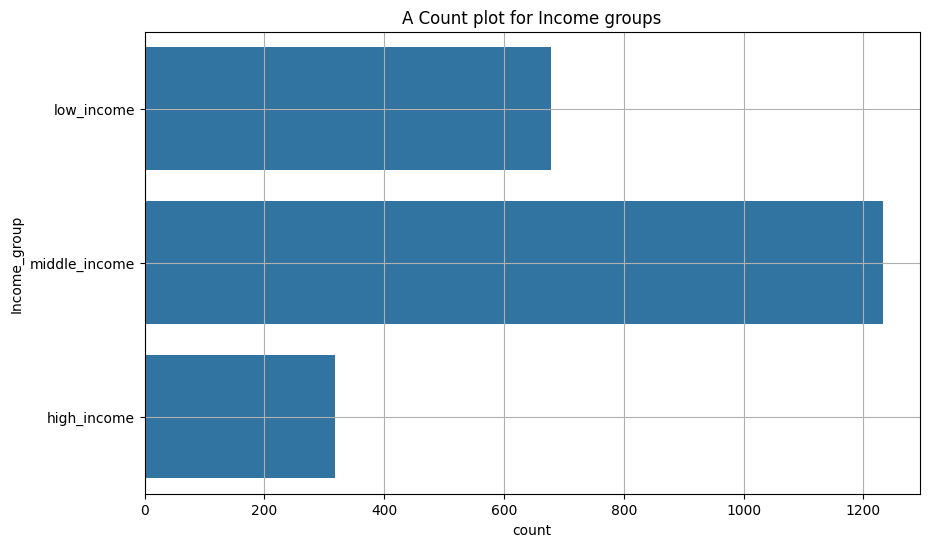

In [302]:
plt.figure(figsize=(10, 6))
sns.countplot(df.Income_group)
plt.title('A Count plot for Income groups')
plt.grid(True)
plt.show()

In [310]:
# distribution of Age groups vs income groups
pd.crosstab(df.Age_group, df.Income_group, margins=True, margins_name='Total')

Income_group,low_income,middle_income,high_income,Total
Age_group,,,,
Young_Adult,25,20,16,61
Adult,174,137,51,362
Middle-Aged,271,382,81,734
Pre-Senior,116,322,68,506
Senior,81,306,73,460
Elderly,12,65,29,106
Total,679,1232,318,2229


In [311]:
income_age = df.groupby('Age_group')['Income'].mean()
round(income_age, 0)

Age_group
Young_Adult    52877.0
Adult          44902.0
Middle-Aged    47903.0
Pre-Senior     53222.0
Senior         55708.0
Elderly        62545.0
Name: Income, dtype: float64

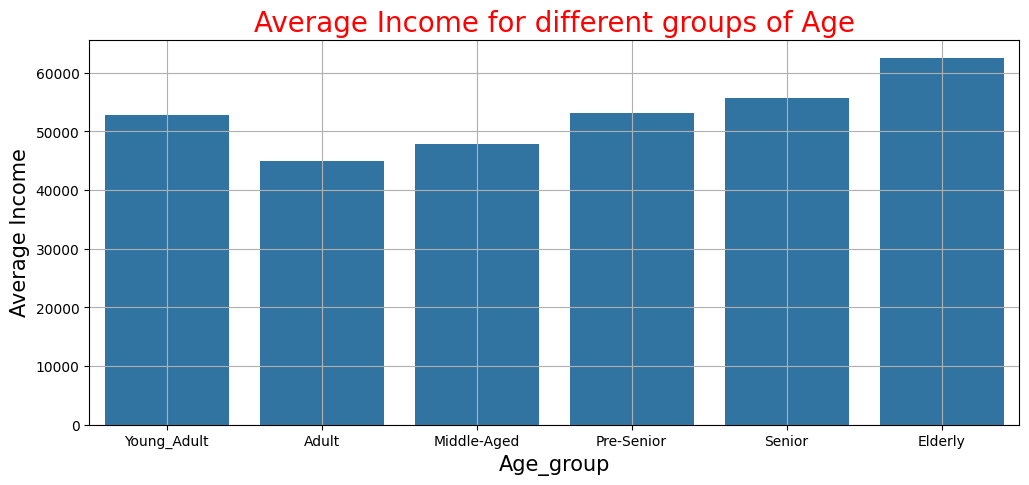

In [315]:
# Average income per age group visualized
ageIncome = df.groupby(['Age_group'])['Income'].mean().reset_index()
plt.figure(figsize=(12,5))
sns.barplot(data = ageIncome[['Age_group', 'Income']], x = "Age_group", y = "Income")
plt.xlabel('Age_group', size = 15)
plt.ylabel('Average Income', size = 15)
plt.grid(True)
plt.title('Average Incomе for different groups of Age', color = 'red', size = 20)
plt.show()

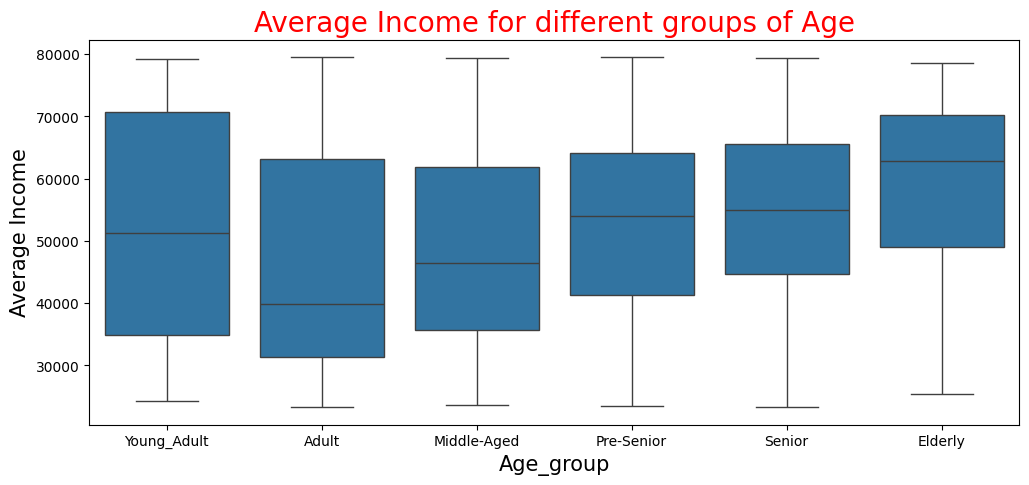

In [317]:
# Boxplot for the Income distribution
plt.figure(figsize=(12,5))
sns.boxplot(x = "Age_group", y = "Income", data=df[(df.Income>df.Income.quantile(0.1))&(df.Income<df.Income.quantile(0.9))])
plt.xlabel('Age_group', size = 15)
plt.ylabel('Average Income', size = 15)
plt.title('Average Incomе for different groups of Age', color = 'red', size = 20)
plt.show()

-  The middle income group forms the highest number of customers for the company; most of customers in this caregory are Middle aged(40-50 years old)

**Insights**
- majority of the customers belong to the middle income bracket followed by low income earners and finally high_income earners
- the middle age & pre-senior groups have the largest number of customers 

**to maximize marketing results** the marketing has to focus on these customer groups

- Since customer income level has a major influence on the customers purchasing power(i.e. amount spend across different product categories), A marketing campaign focused on the high income age groups will be of positive outcome for the company 

In [319]:
print(df.columns)

Index(['ID', 'Customer_age', 'Customer_days', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Complain', 'Response', 'Age_group', 'Income_group'],
      dtype='object')


In [321]:
start_cols = ['ID', 'Customer_age', 'Age_group', 'Income','Income_group']
other_cols = [col for col in df.columns if col not in start_cols]
other_cols

['Customer_days',
 'Education',
 'Marital_Status',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'Complain',
 'Response']

In [324]:
# reoder columns with calculated columns included
start_cols = ['ID', 'Customer_age', 'Age_group', 'Income','Income_group']
other_cols = [col for col in df.columns if col not in start_cols]
new_cols_order = start_cols + other_cols

#reindex dataframe
df = df.reindex(columns=new_cols_order)
df.head()


,ID,Customer_age,Age_group,Income,Income_group,Customer_days,Education,Marital_Status,Kidhome,Teenhome,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response
0,5524,63,Senior,58138.0,middle_income,4721,Graduation,Single,0,0,...,10,4,7,0,0,0,0,0,0,1
1,2174,66,Senior,46344.0,middle_income,4171,Graduation,Single,1,1,...,1,2,5,0,0,0,0,0,0,0
2,4141,55,Pre-Senior,71613.0,middle_income,4370,Graduation,Together,0,0,...,2,10,4,0,0,0,0,0,0,0
3,6182,36,Adult,26646.0,low_income,4197,Graduation,Together,1,0,...,0,4,6,0,0,0,0,0,0,0
4,5324,39,Adult,58293.0,middle_income,4219,PhD,Married,1,0,...,3,6,5,0,0,0,0,0,0,0


In [326]:
# save the cleaned data for use in segmentation and model building 
import os

# Create the file path
file_path = os.path.join('data', 'Cleaned_dataframe.csv')

# Save the DataFrame to the CSV file
df.to_csv(file_path, index=False)